### 决策树  
决策树（DecisionTree）又称为判定树，是一种用于分类和回归任务的非参数的监督式学习方法，采用树形结构，使用层层推理实现决策。  




决策树由根节点、分支、内部节点和叶节点组成。根节点包含样本的全集，每个内部节点都对应一次决策过程或者说一次属性测试，每个叶节点都对应一个决策结果（注意，不同的叶节点可能对应同一个决策结果）。  


在信息论与概率论中，信息熵是一种随机变量不确定性的度量。  


熵值越大，不确定性越大，信息量越大。表示随机事件的概率，公式：  

![jupyter](7.png)  

![jupyter](8.png)  

![jupyter](9.png)  


在决策树中，信息熵用来衡量数据集的纯度。通过对不同特征的划分来减少数据集的不确定性（即熵值），这可以帮助模型找到最佳分裂点，从而有效地分类或回归数据。

### 身高体重数据的分类  
输入数据集包含10个样本，每个样本两个属性：身高、体重，类别标签是thin、fat。  

### 决策树案例

In [4]:
from sklearn import tree
x = [[0, 0], [1, 1]]
y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

# 预测类别
clf.predict([[2., 2.]])

array([1])

In [6]:
# 预测属于每一类别的概率
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

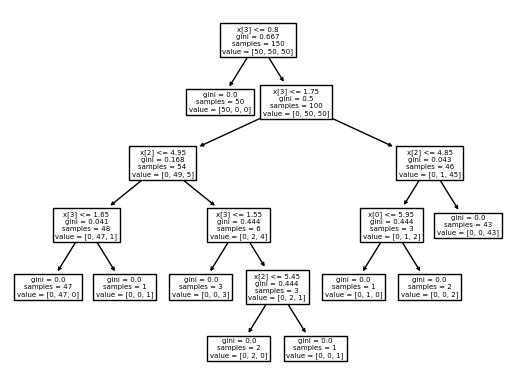

In [8]:
# 鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

tree.plot_tree(clf)

### 决策树案例

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image
# 启用未来行为，避免警告
pd.set_option('future.no_silent_downcasting', True)

data = []
labels = []
data = pd.read_csv('身高体重.txt', sep=' ', header=None)
x_train = data[[0, 1]]
y_train = data[2]
# 转换b
# 法1 replace 
y_train = y_train.replace({'thin': 0, 'fat': 1})
print(y_train)
x_train

# 法二  apply + lambda实现
# df['body_type_binary'] = df['body_type'].apply(lambda x: 1 if x == 'fat' else 0)


0    0
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    1
Name: 2, dtype: object


,0,1
0,1.5,50
1,1.5,60
2,1.6,40
3,1.6,60
4,1.7,60
5,1.7,80
6,1.8,60
7,1.8,90
8,1.9,70
9,1.9,80


**注意，对y_train进行转换后，如果想要对模型进行训练，必须是数值型的**  
一般转换后都是obj类型的，所以还要对y_train进行转换

In [14]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [16]:
x_train.dtype

dtype('float64')

In [18]:
y_train.dtype

dtype('O')

In [20]:
# 将y_train 类型改为int
y_train = y_train.astype(int)
y_train.dtype

dtype('int32')

In [22]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x_train, 
                                                    y_train, test_size=0.2, random_state=0)
print(f"x_train\n: {x_train}")
print(f"x_test\n: {x_test}")
print(f"y_train\n: {y_train}")
print(f"y_test\n: {y_test}")

x_train
: [[ 1.7 60. ]
 [ 1.9 80. ]
 [ 1.5 60. ]
 [ 1.8 60. ]
 [ 1.8 90. ]
 [ 1.6 60. ]
 [ 1.5 50. ]
 [ 1.7 80. ]]
x_test
: [[ 1.6 40. ]
 [ 1.9 70. ]]
y_train
: [0 1 1 0 1 1 0 1]
y_test
: [0 0]


In [24]:
# 信息熵作为划分标准，对决策进行训练
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [26]:
# 训练
clf.fit(x_train, y_train)

# 特征系数，系数反应每个特征的影响力，越大的表明该特征在分类中起到的作用越大
print('身高、体重这两个特征所占的权重是：', clf.feature_importances_)

身高、体重这两个特征所占的权重是： [0.27501449 0.72498551]


In [28]:
# 预测
answer = clf.predict(x_test)

print('测试数据的值为：', x_test[0], x_test[1])
print('模型预测的类别结果：', answer)
print('测试数据真实类是：', y_test)

测试数据的值为： [ 1.6 40. ] [ 1.9 70. ]
模型预测的类别结果： [0 0]
测试数据真实类是： [0 0]


In [ ]:
# 保存为dot文件, 一般不用，一般保存为pdf
with open('tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [ ]:
# 决策树结构图保存为pdf,要先安装graphviz库
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')

[Text(0.6666666666666666, 0.875, 'x[1] <= 70.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5, 0.625, 'x[0] <= 1.65\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 55.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

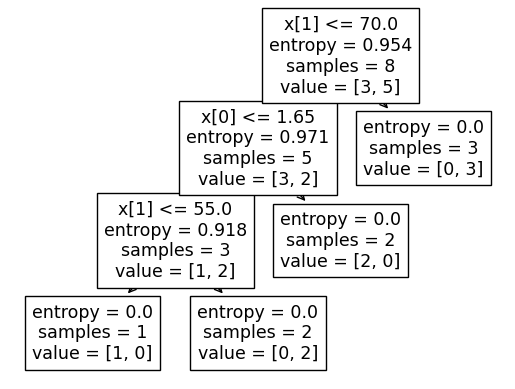

In [30]:
# 直接绘制
tree.plot_tree(clf)

In [32]:
# 准确率与召回率
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

precision, recall, thresholds = precision_recall_curve(
    y_train, clf.predict(x_train)
)

answer = clf.predict_proba(x_train)[:, 1]


print(classification_report(y_train, answer, target_names=['thin', 'fat']))

              precision    recall  f1-score   support

        thin       1.00      1.00      1.00         3
         fat       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



身高、体重这两个特征所占的权重是： [0.27501449 0.72498551]
测试数据的值为： [ 1.6 40. ] [ 1.9 70. ]
模型预测的类别结果： [0 0]
测试数据真实类是： [0 0]
              precision    recall  f1-score   support

        thin       1.00      1.00      1.00         3
         fat       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



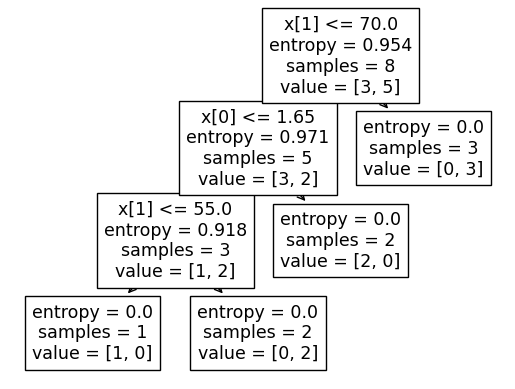

In [34]:
# 完整代码
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image
# 启用未来行为，避免警告
pd.set_option('future.no_silent_downcasting', True)

data = []
labels = []
data = pd.read_csv('身高体重.txt', sep=' ', header=None)
x_train = data[[0, 1]]
y_train = data[2]
# 转换b
# 法1 replace 
y_train = y_train.replace({'thin': 0, 'fat': 1})
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_train, 
                                                    y_train, test_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
print('身高、体重这两个特征所占的权重是：', clf.feature_importances_)

answer = clf.predict(x_test)

print('测试数据的值为：', x_test[0], x_test[1])
print('模型预测的类别结果：', answer)
print('测试数据真实类是：', y_test)

tree.plot_tree(clf)

# 准确率与召回率
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

precision, recall, thresholds = precision_recall_curve(
    y_train, clf.predict(x_train)
)

answer = clf.predict_proba(x_train)[:, 1]


print(classification_report(y_train, answer, target_names=['thin', 'fat']))